In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from termcolor import colored
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [180]:
data= pd.read_csv('comments.csv')
data.head()

,video_id,comment_text,published_at,author
0,sSOxPJD-VNo,Amazing interview!!! Thank you both!!!,2025-03-11T10:02:39Z,@markdevito5312
1,sSOxPJD-VNo,Have Elon back his brain up on a super compute...,2025-03-11T09:55:22Z,@DanthonyFrmDaHood
2,sSOxPJD-VNo,I really hope this Presidency isn't just a mon...,2025-03-11T09:54:48Z,@krobinwoollacott8584
3,sSOxPJD-VNo,"That 33 comment makes me wonder,you know 🧐 thi...",2025-03-11T09:52:26Z,@krobinwoollacott8584
4,sSOxPJD-VNo,YouTube getting real comfortable with these do...,2025-03-11T09:51:42Z,@johnstriker480


In [3]:
data['video_id'].unique()

array(['wz_42pckM7w', '7qZl_5xHoBw', 'JN3KPFbWCy8', '3l-IK4SCp34',
       'VgsC_aBquUE', 'mXWbTzF8nzc', 'FFlaRqBLQVo', 'hMbcMO5JgEo',
       '07UtZXVg_ks', 'V-bBL0303Kw'], dtype=object)

In [4]:
from datetime import datetime

def TimeExecutor(text):
    dt = datetime.fromisoformat(text.replace('Z','+00:00'))
    date = dt.date()
    time = dt.time()
    return date, time



In [5]:
def TimeDistrub(data):
    Temp= data['published_at'].apply(TimeExecutor).apply(pd.Series)
    Temp = Temp.rename(columns={0:'data',1:'time'})
    Temp['data'] = pd.to_datetime(Temp['data'])
    Temp['time'] = Temp['time'] = pd.to_datetime(Temp['time'], format='%H:%M:%S').dt.time
    Temp['total_seconds'] = Temp['time'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second) + (Temp['data'] - Temp['data'].min()).dt.total_seconds()
    return pd.DataFrame({'total_seconds' :Temp['total_seconds']})


In [ ]:
Sent = pd.DataFrame({'total_seconds':TimeDistrub(data[data['video_id'] == 'JN3KPFbWCy8'])})
analyzer = SentimentIntensityAnalyzer()
Sent['sentiment']  = data[data['video_id'] == 'mXWbTzF8nzc']


ValueError: If using all scalar values, you must pass an index

In [7]:
def categorize_sentiment(score):
    if score <= -0.5:
        return 'Very Negative'
    elif -0.5 < score <= -0.05:
        return 'Negative'
    elif -0.05 < score < 0.05:
        return 'Neutral'
    elif 0.05 <= score < 0.5:
        return 'Positive'
    else:
        return 'Very Positive'
def SentimentExecutor(data):
    analyzer = SentimentIntensityAnalyzer()
    data['comment_text'] = data['comment_text'].fillna('').astype(str)
    Tmp = pd.DataFrame({'sentiment' : data['comment_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])})
    Tmp['sentiment_category'] = Tmp['sentiment'].apply(categorize_sentiment)
    return Tmp[['sentiment','sentiment_category']]



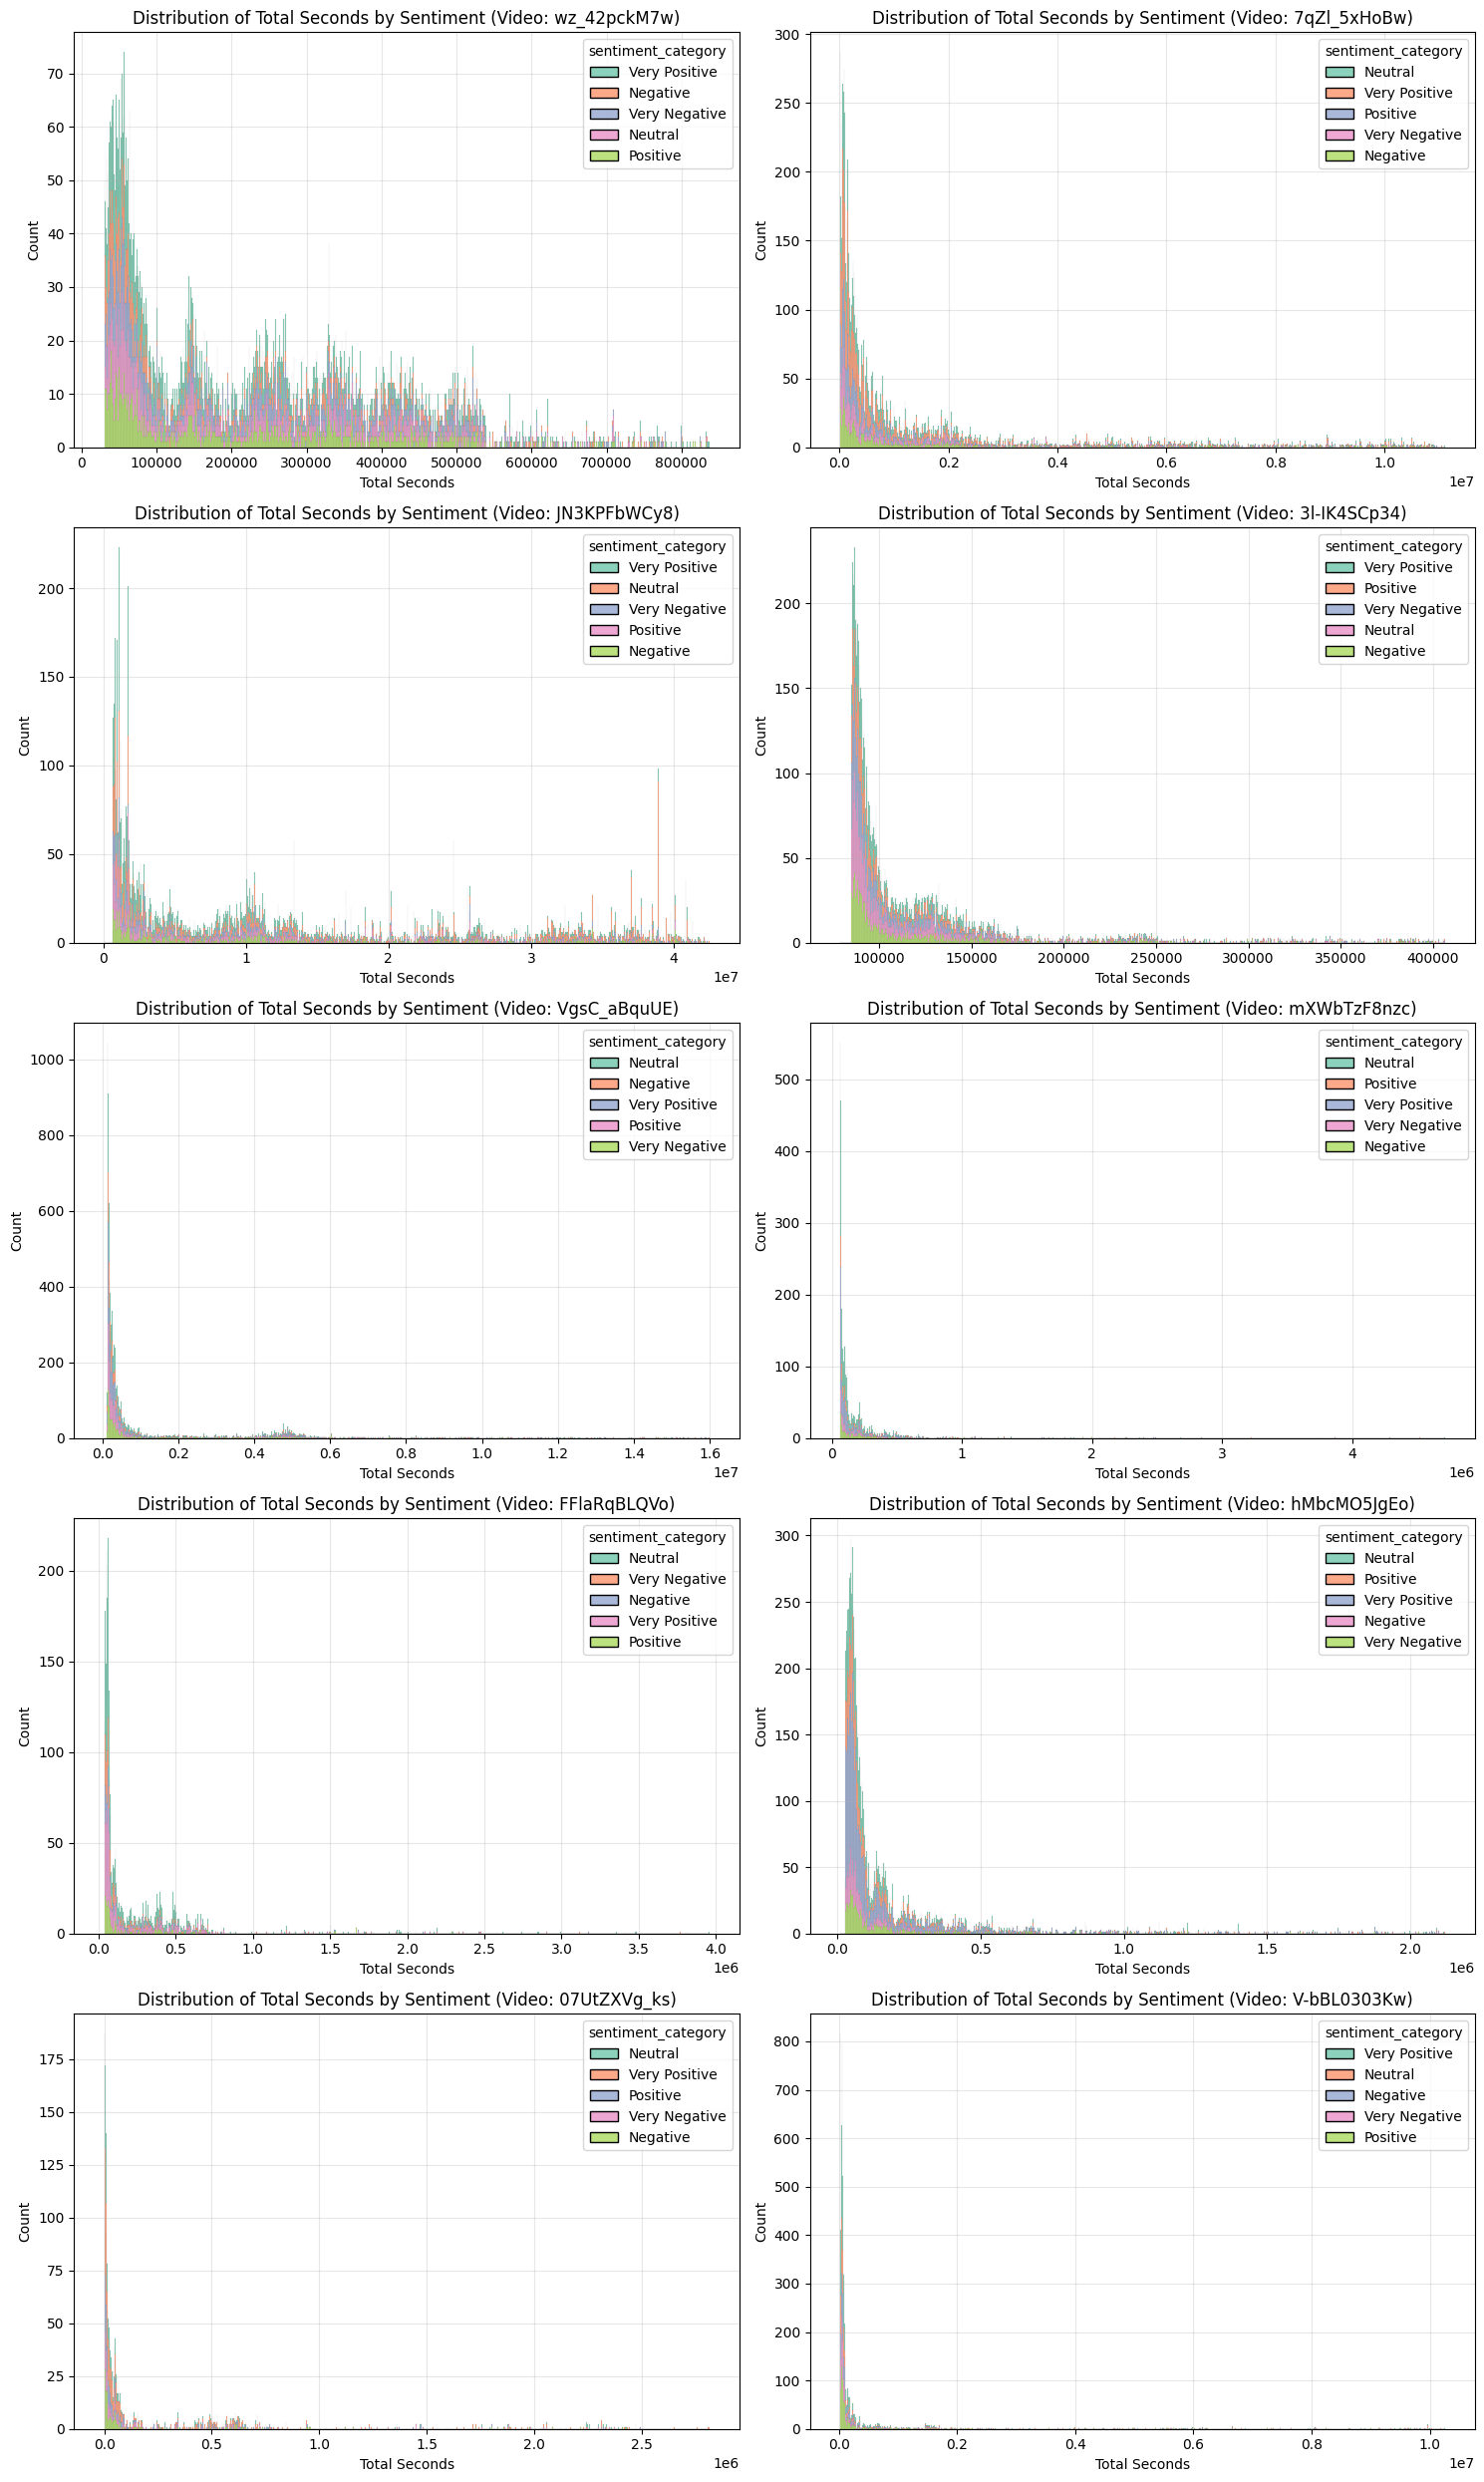

In [8]:
def HueGraph(data):

    unique_videos = data['video_id'].unique()
    n_videos = len(unique_videos)


    n_cols = 2  
    n_rows = (n_videos + n_cols - 1) // n_cols  

    plt.figure(figsize=(15, 5 * n_rows))  
    for idx, video in enumerate(unique_videos):

        TempData = TimeDistrub(data[data['video_id'] == video])
        TempData['comment_text'] = data['comment_text']
        TempData['sentiment_category'] = SentimentExecutor(TempData)['sentiment_category']

        plt.subplot(n_rows, n_cols, idx + 1)
        sns.histplot(data=TempData,x='total_seconds',hue='sentiment_category',multiple='stack', palette='Set2', bins=1000)  
        plt.xlabel('Total Seconds')
        plt.ylabel('Count')
        plt.title(f'Distribution of Total Seconds by Sentiment (Video: {video})')
        
        

        plt.grid(True, alpha=0.3)  


    plt.tight_layout()
    plt.show()
    
HueGraph(data=data)

In [ ]:

def SentAndTimeExec(data):
    TempData = TimeDistrub(data)
    TempData['comment_text'] = data['comment_text']
    TempData['sentiment_category'] = SentimentExecutor(TempData)['sentiment_category']
    return TempData




In [ ]:
Bot =FirstVideo[(FirstVideo['total_seconds'] > 0.111e7) & (FirstVideo['total_seconds'] < 0.112e7)]

,total_seconds,comment_text,sentiment_category
28622,1119419.0,Musk really hates the SEC 😂🎉,Positive
28623,1119333.0,Setting aside that there's a vast number of _a...,Very Positive
28624,1118909.0,Was anyone relieved when they heard a 'civilis...,Very Negative
28625,1118896.0,"Lex, around the 53 minute mark, when you guys ...",Very Positive
28626,1118736.0,Intro 🔥🔥🔥🔥🔥🔥🔥🔥,Very Negative
...,...,...,...
28769,1111593.0,First conversation turns to bei g about apes g...,Very Negative
28770,1111210.0,Elon Musk for President ! woop woop !,Neutral
28771,1110736.0,44:12 this is why sentience in AI is unlikely ...,Neutral
28772,1110353.0,the question that I would answer : Why does pe...,Negative


In [99]:
Bot['total_seconds'].describe()

count    1.520000e+02
mean     1.116923e+06
std      1.394657e+03
min      1.110050e+06
25%      1.117216e+06
50%      1.117218e+06
75%      1.117242e+06
max      1.119419e+06
Name: total_seconds, dtype: float64

In [95]:
data.iloc[Bot.index].to_csv('tmpcomments2.csv',index=False)

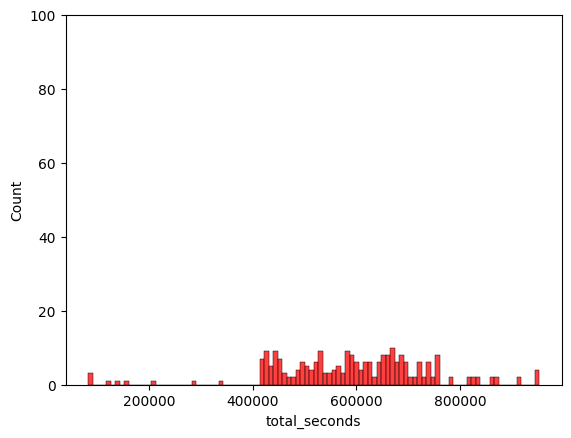

In [152]:
num_bins = 100

ylimup = 100
# plt.ylim([0,ylimup])
# sns.histplot(data=FirstVideo[FirstVideo['sentiment_category'] == 'Very Positive'],x='total_seconds',color='blue',bins = num_bins)
# plt.show()
# sns.histplot(data=FirstVideo[FirstVideo['sentiment_category'] == 'Positive'],x='total_seconds',color='green',bins = num_bins)
# plt.ylim([0,ylimup])
# plt.show()
# sns.histplot(data=FirstVideo[FirstVideo['sentiment_category'] == 'Neutral'],x='total_seconds',color='black',bins = num_bins)
# plt.ylim([0,ylimup])
# plt.show()
# sns.histplot(data=FirstVideo[FirstVideo['sentiment_category'] == 'Negative'],x='total_seconds',color='orange',bins = num_bins)
# plt.ylim([0,ylimup])
# plt.show()
sns.histplot(data=FirstVideo[FirstVideo['sentiment_category'] == 'Very Negative'],x='total_seconds',color='red',bins = num_bins)
plt.ylim([0,ylimup])
plt.show()

array([[<Axes: title={'center': 'total_seconds'}>]], dtype=object)

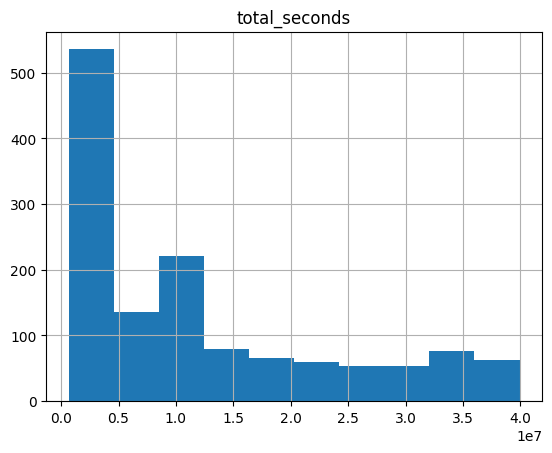

In [116]:
FirstVideo[FirstVideo['sentiment_category'] == 'Very Negative'].hist()

In [30]:
data.iloc[FirstVideo[FirstVideo['sentiment_category'] == 'Very Negative'].index]

,video_id,comment_text,published_at,author
20003,JN3KPFbWCy8,"You see, how many Hamas that you create? Let's...",2025-03-13T02:05:05Z,@chowsc7977
20005,JN3KPFbWCy8,Beating hatred? Perhaps one should stop engagi...,2025-03-11T02:29:05Z,@Privacy01-m5r
20006,JN3KPFbWCy8,Musk voice sounds robotic … is it the mic qual...,2025-03-10T23:28:59Z,@__-vk2gk
20020,JN3KPFbWCy8,The root of all evil is money,2025-03-05T18:40:54Z,@mikeharris8910
20023,JN3KPFbWCy8,"Because of your support for Elon Musk, I have ...",2025-03-04T01:27:20Z,@johnfry9236
20028,JN3KPFbWCy8,I was built to take away all your pain,2025-03-01T04:55:54Z,@Tararizzor05
20095,JN3KPFbWCy8,War second annual burton high ost diam diam su...,2025-02-24T01:02:20Z,@ritasunarti-16
20104,JN3KPFbWCy8,War second annual burton high ost diam diam su...,2025-02-24T00:47:35Z,@ritasunarti-16
20109,JN3KPFbWCy8,Tengo que reconocer que su teoría sobre posibl...,2025-02-22T20:51:22Z,@amparoarteagaleon8486
20113,JN3KPFbWCy8,It all started when they separated the atom. H...,2025-02-22T06:41:48Z,@Mem-y7h


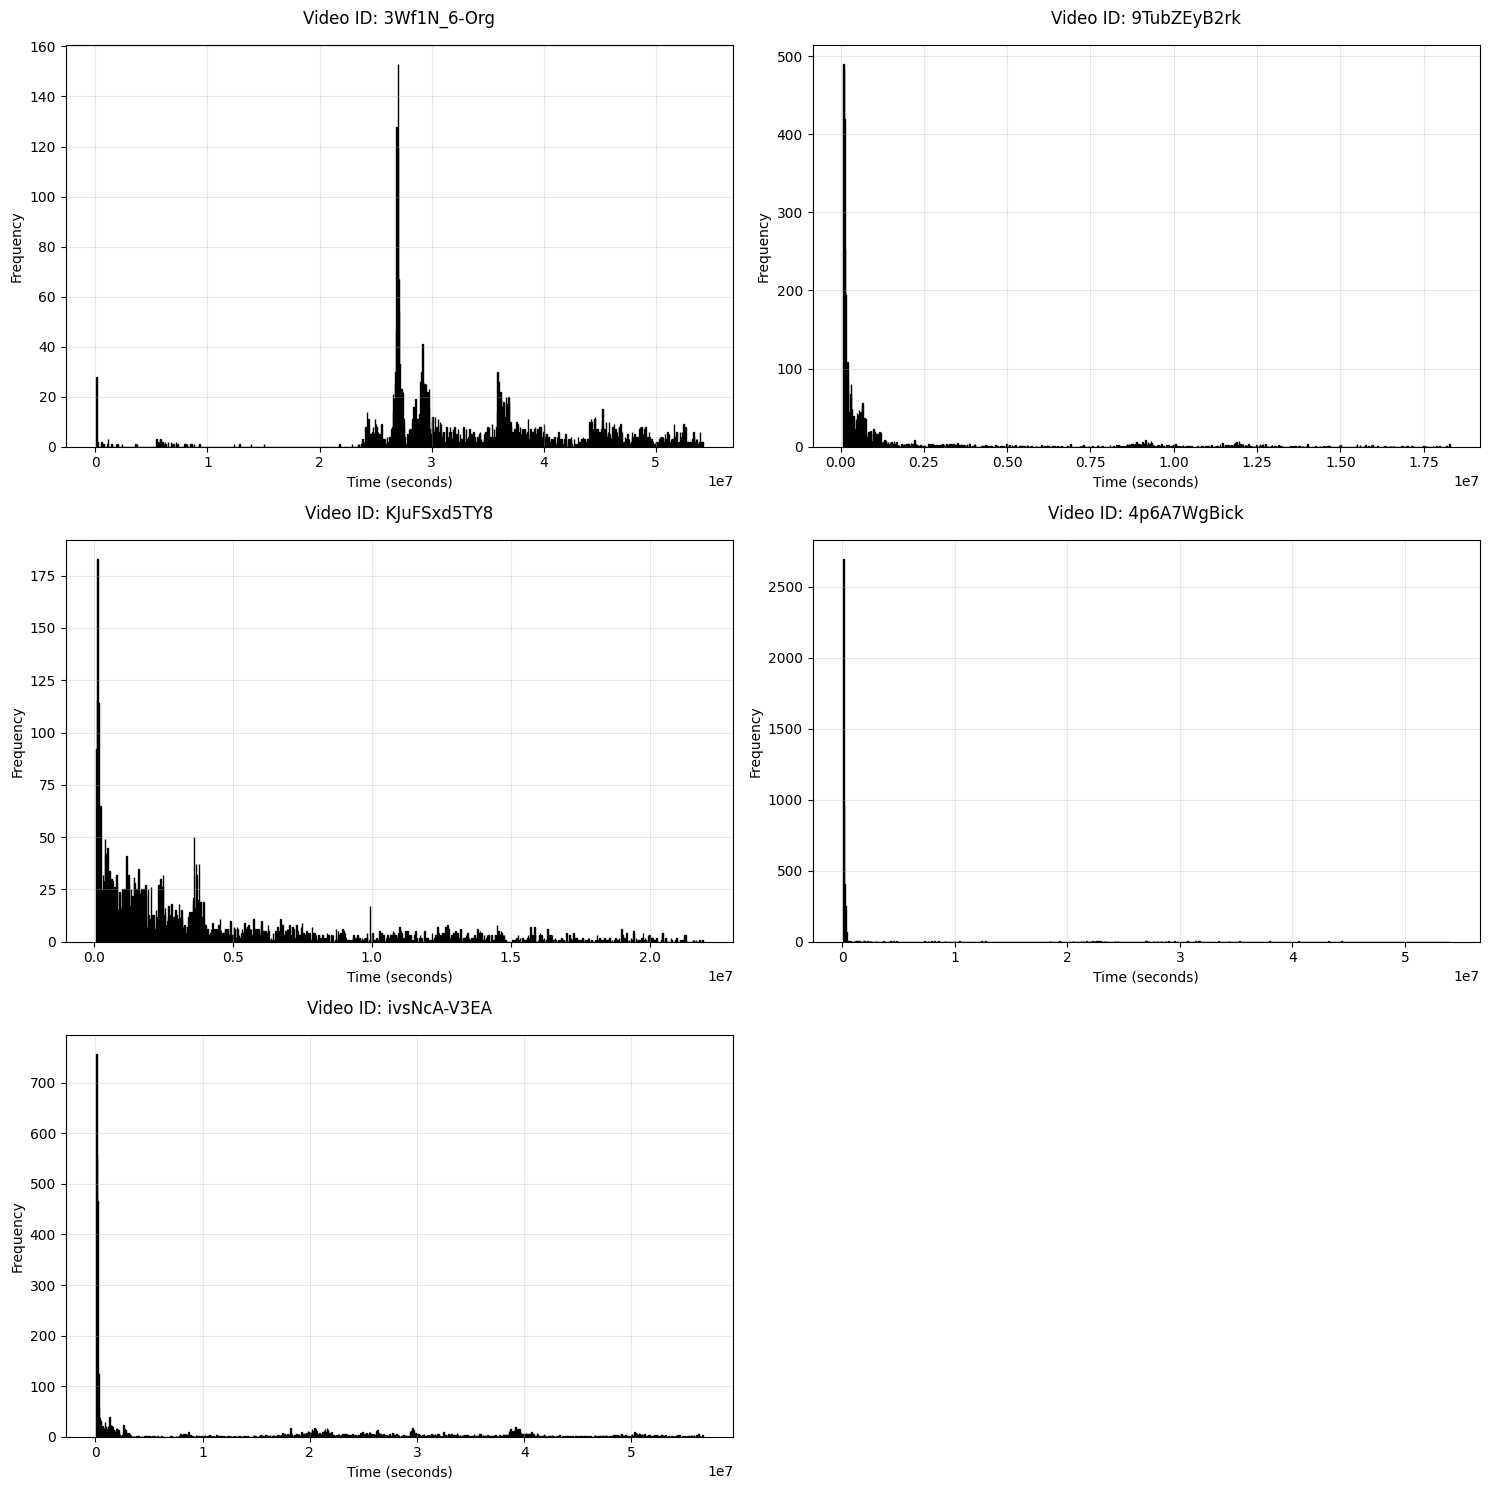

In [7]:
unique_videos = data['video_id'].unique()
n_videos = len(unique_videos)


n_cols = 2  
n_rows = (n_videos + n_cols - 1) // n_cols  


plt.figure(figsize=(15, 5 * n_rows))  
for idx, video in enumerate(unique_videos):

    TempData = TimeDistrub(data[data['video_id'] == video])
    

    plt.subplot(n_rows, n_cols, idx + 1)
    

    TempData.hist(bins=1000, color='skyblue', edgecolor='black')

    plt.title(f'Video ID: {video}', fontsize=12, pad=15)
    plt.xlabel('Time (seconds)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
    plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
   

In [129]:
mas = FirstVideo[(FirstVideo['total_seconds']  < 1e6)]
mas.shape

(3417, 3)

In [121]:
def find_dense_intervals(df, count, deltatime, column_name='total_second'):
    """
    Находит индексы в DataFrame, где в любом интервале длиной deltatime
    содержится больше count точек.
    
    Args:
        df: pandas DataFrame с колонкой временных значений
        count: минимальное количество точек в интервале
        deltatime: максимальная ширина интервала времени
        column_name: имя колонки с временными значениями (по умолчанию 'total_second')
    
    Returns:
        список индексов DataFrame, удовлетворяющих условию
    """
    # Извлекаем значения из колонки и сортируем, если нужно
    total_seconds = df[column_name].values
    # Если данные не отсортированы, сортируем их с сохранением индексов
    if not np.all(total_seconds[:-1] <= total_seconds[1:]):
        df_sorted = df.sort_values(column_name)
        total_seconds = df_sorted[column_name].values
        original_indices = df_sorted.index
    else:
        original_indices = df.index
    
    result = set()  # Используем set для уникальных индексов
    n = len(total_seconds)
    
    # Проходим по массиву
    for i in range(n):
        start_time = total_seconds[i]
        current_indices = []
        
        # Смотрим вперед в пределах deltatime
        for j in range(i, n):
            if total_seconds[j] <= start_time + deltatime:
                current_indices.append(j)
            else:
                break
                

        if len(current_indices) > count:
            result.update(original_indices[current_indices])
    
    return sorted(list(result))  


data.iloc[find_dense_intervals(FirstVideo,50,60,column_name='total_seconds')].to_csv('tmpcomments2.csv')

In [199]:
data= pd.read_csv('comments3.csv')
data.head()

,video_id,comment_text,published_at,author
0,qCbfTN-caFI,Thank you for listening ❤ Check out our sponso...,2024-09-03T16:18:36Z,@lexfridman
1,qCbfTN-caFI,Lex come on man. You cant let this dude claim ...,2025-03-17T08:48:30Z,@theycallmedip
2,qCbfTN-caFI,India ❤❤❤❤🇮🇳🇮🇳🇮🇳😊😊,2025-03-17T06:41:58Z,@GudduKumar-x9s3h
3,qCbfTN-caFI,https://youtu.be/SHGnPDriOLQ\n22.02.22,2025-03-16T18:44:30Z,@danielUKIgor
4,qCbfTN-caFI,Deranged 😂,2025-03-16T16:08:31Z,@M.Burden


In [200]:
data['video_id'].unique()

array(['qCbfTN-caFI', 'NMHiLvirCb0', 'MzkgWDCucNY', '8NLzc9kobDk',
       '_1f-o0nqpEI', 'Kbk9BiPhm7o', 'DyoVVSggPjY', 'tdv7r2JSokI',
       'pwN8u6HFH8U', 'XJTMQtE-MIo', '2oxdDKHdcM8'], dtype=object)

In [243]:
FirstVideo = SentAndTimeExec(data[(data['video_id'] ==     '2oxdDKHdcM8')])
#FirstVideo = FirstVideo[FirstVideo['total_seconds'] < 4e7]

In [244]:
len(find_dense_intervals(FirstVideo,10,60,column_name='total_seconds'))

44

In [245]:
data.iloc[find_dense_intervals(FirstVideo,10,60,column_name='total_seconds')].to_csv('tmpcomments2.csv')